CMPE 351 Assignment 1, Nathan Goodman 20228249

In [45]:
#Imports
import pandas as pd #Dataframes
import numpy as np
import missingno  as msno #Missing data visualization
import matplotlib.pyplot as plt #Plots
import math
import statsmodels.api as sm #For multicollinearity check
from statsmodels.stats.outliers_influence import variance_inflation_factor #For multicollinearity check


In [3]:
all_data = pd.read_csv('drive/MyDrive/Assignment1.csv') #Used Google Collab
all_data.info()
all_data['Sale Date'] = pd.to_datetime(all_data['Sale Date']) #For Date Comparisions Later

<ipython-input-3-08dcbe817b26>:1: DtypeWarning: Columns (3,18) have mixed types. Specify dtype option on import or set low_memory=False.
  all_data = pd.read_csv('drive/MyDrive/Assignment1.csv') #Used Google Collab


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264350 entries, 0 to 264349
Data columns (total 21 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Borough                         240387 non-null  float64
 1   Neighborhood                    256658 non-null  object 
 2   Building Class Category         256658 non-null  object 
 3   Tax Class At Present            246136 non-null  object 
 4   Block                           256658 non-null  float64
 5   Lot                             256658 non-null  float64
 6   Easement                        0 non-null       float64
 7   Building Class At Present       256313 non-null  object 
 8   Address                         256658 non-null  object 
 9   Apartment Number                64798 non-null   object 
 10  Zip Code                        256641 non-null  float64
 11  Residential Units               193861 non-null  float64
 12  Commercial Units

# **Q1: Statistical Data Exploration**


## Statistics of House Price (for each burough):

In [ ]:
#Break Dataframe Up Based on Borough
Bronx_data = all_data.loc[all_data['Borough'] == 2]
Brooklyn_data = all_data.loc[all_data['Borough'] == 3]
Manhattan_data = all_data.loc[all_data['Borough'] == 1]
Queens_data = all_data.loc[all_data['Borough'] == 4]
StatenIsland_data = all_data.loc[all_data['Borough'] == 5]

In [ ]:
print("-----Bronx Sale Prices-----")
print(
    "Mean: " + str(Bronx_data['Sale Price'].mean().round(2)) + "\n" +
    "Median: " + str(Bronx_data['Sale Price'].median()) + "\n" +
    "Min: " + str(Bronx_data['Sale Price'].min()) + "\n" +
    "Max: " + str(Bronx_data['Sale Price'].max()) + "\n"+
    "-Percentiles:- \n" + str(Bronx_data['Sale Price'].quantile([0.25,0.75])) + "\n"
    "-Variability:-\n" +
    "Variance: " + str(Bronx_data['Sale Price'].var()) + "\n" +
    "Standard Deviation: " + str(Bronx_data['Sale Price'].std())
      )
print("-----Brooklyn Sale Prices-----")
print(
    "Mean: " + str(Brooklyn_data['Sale Price'].mean().round(2)) + "\n" +
    "Median: " + str(Brooklyn_data['Sale Price'].median()) + "\n" +
    "Min: " + str(Brooklyn_data['Sale Price'].min()) + "\n" +
    "Max: " + str(Brooklyn_data['Sale Price'].max()) + "\n"+
    "-Percentiles:- \n" + str(Brooklyn_data['Sale Price'].quantile([0.25,0.75])) + "\n"
    "-Variability:-\n" +
    "Variance: " + str(Brooklyn_data['Sale Price'].var()) + "\n" +
    "Standard Deviation: " + str(Brooklyn_data['Sale Price'].std())
      )
print("-----Manhattan Sale Prices-----")
print(
    "Mean: " + str(Manhattan_data['Sale Price'].mean().round(2)) + "\n" +
    "Median: " + str(Manhattan_data['Sale Price'].median()) + "\n" +
    "Min: " + str(Manhattan_data['Sale Price'].min()) + "\n" +
    "Max: " + str(Manhattan_data['Sale Price'].max()) + "\n"+
    "-Percentiles:- \n" + str(Manhattan_data['Sale Price'].quantile([0.25,0.75]))  + "\n"
    "-Variability:-\n" +
    "Variance: " + str(Manhattan_data['Sale Price'].var()) + "\n" +
    "Standard Deviation: " + str(Manhattan_data['Sale Price'].std())
      )
print("-----Queens Sale Prices-----")
print(
    "Mean: " + str(Queens_data['Sale Price'].mean().round(2)) + "\n" +
    "Median: " + str(Queens_data['Sale Price'].median()) + "\n" +
    "Min: " + str(Queens_data['Sale Price'].min()) + "\n" +
    "Max: " + str(Queens_data['Sale Price'].max()) + "\n"+
    "-Percentiles:- \n" + str(Queens_data['Sale Price'].quantile([0.25,0.75])) + "\n"
    "-Variability:-\n" +
    "Variance: " + str(Queens_data['Sale Price'].var()) + "\n" +
    "Standard Deviation: " + str(Queens_data['Sale Price'].std())
      )
print("-----Staten Island Sale Prices-----")
print(
    "Mean: " + str(StatenIsland_data['Sale Price'].mean().round(2)) + "\n" +
    "Median: " + str(StatenIsland_data['Sale Price'].median()) + "\n" +
    "Min: " + str(StatenIsland_data['Sale Price'].min()) + "\n" +
    "Max: " + str(StatenIsland_data['Sale Price'].max()) + "\n"+
    "Percentiles: \n" + str(StatenIsland_data['Sale Price'].quantile([0.25,0.75])) + "\n"
    "-Variability:-\n" +
    "Variance: " + str(StatenIsland_data['Sale Price'].var()) + "\n" +
    "Standard Deviation: " + str(StatenIsland_data['Sale Price'].std())
      )

-----Bronx Sale Prices-----
Mean: 844748.28
Median: 325000.0
Min: 0.0
Max: 107357142.0
-Percentiles:- 
0.25         0.0
0.75    735000.0
Name: Sale Price, dtype: float64
-Variability:-
Variance: 14806501256534.764
Standard Deviation: 3847921.680145629
-----Brooklyn Sale Prices-----
Mean: 1204292.0
Median: 605000.0
Min: 0.0
Max: 317792634.0
-Percentiles:- 
0.25          0.0
0.75    1202750.0
Name: Sale Price, dtype: float64
-Variability:-
Variance: 23136922290929.29
Standard Deviation: 4810085.476468094
-----Manhattan Sale Prices-----
Mean: 3154600.81
Median: 950000.0
Min: 0.0
Max: 1033000000.0
-Percentiles:- 
0.25     440000.0
0.75    2161127.0
Name: Sale Price, dtype: float64
-Variability:-
Variance: 376732080161526.25
Standard Deviation: 19409587.325894546
-----Queens Sale Prices-----
Mean: 948481.97
Median: 395000.0
Min: 0.0
Max: 317792634.0
-Percentiles:- 
0.25         0.0
0.75    816687.5
Name: Sale Price, dtype: float64
-Variability:-
Variance: 45821831432031.05
Standard Deviatio

## Types of Houses Involved In Dataset:

In [ ]:
BuildingTypes = all_data['Building Class Category'].value_counts()
print(BuildingTypes)

01 ONE FAMILY DWELLINGS                       54986
02 TWO FAMILY DWELLINGS                       45441
13 CONDOS - ELEVATOR APARTMENTS               43704
10 COOPS - ELEVATOR APARTMENTS                41727
03 THREE FAMILY DWELLINGS                     12591
09 COOPS - WALKUP APARTMENTS                   8552
07 RENTALS - WALKUP APARTMENTS                 8362
04 TAX CLASS 1 CONDOS                          4955
15 CONDOS - 2-10 UNIT RESIDENTIAL              4913
44 CONDO PARKING                               4505
17 CONDO COOPS                                 3951
05 TAX CLASS 1 VACANT LAND                     3176
12 CONDOS - WALKUP APARTMENTS                  3050
22 STORE BUILDINGS                             2479
14 RENTALS - 4-10 UNIT                         1807
29 COMMERCIAL GARAGES                          1432
47 CONDO NON-BUSINESS STORAGE                  1359
08 RENTALS - ELEVATOR APARTMENTS               1342
21 OFFICE BUILDINGS                             955
43 CONDO OFF

## Missing Values in Dataset:

<Axes: >

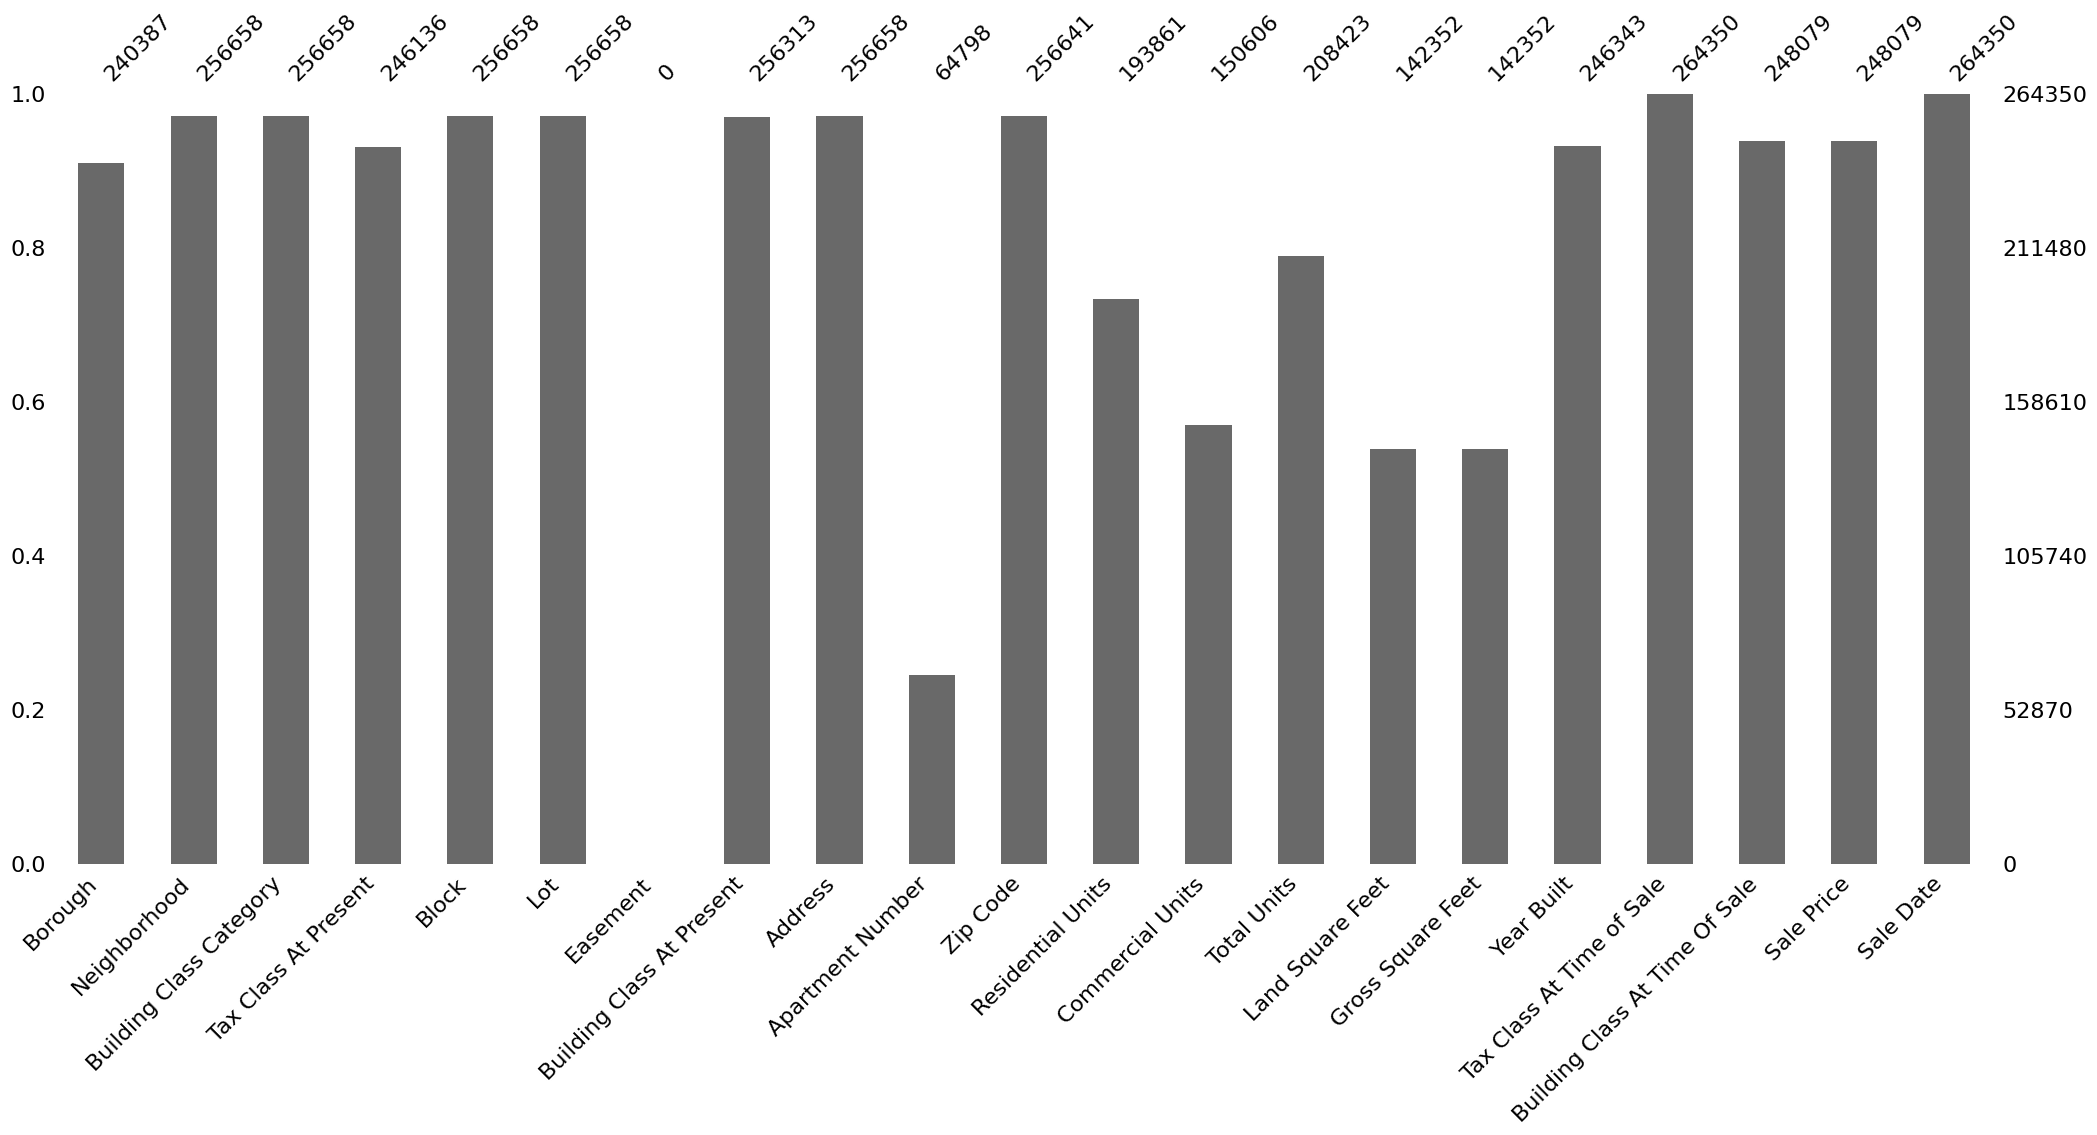

In [ ]:
all_data.isnull().values.sum() #Total number of missing values
all_data.isna().sum() #Per column summarry of missing
msno.bar(all_data) #Visualized

# **Q2: Hypothesis Testing**

Note: used Chat GPT to find steps for actually conduction tests since not provided by the class: https://chat.openai.com/c/244d5e10-ef45-43f6-b9cf-a5650607f241

## Did real estate in Manhattan see a greater increase in sale price relative to New York as a whole since 2021?



The COVID pandemic is known to have exasterbated inequality worldwide by providing the rich with opportunities to further grow thier wealth. Manhattan is the most expensive real estate market in New York, a drastic increase in this market could fuel a recovery in the greater NYC real estate market.

Test to be performed: Paired Sample T-Test as we have a two pairs of data (t-distribution) and this is typically used in before an after comparisons like this one.

H0: Difference in "Manhattan sales prices vs all sales prices" did **not** experience an increase between 2021-2022.

H1: Difference in "Manhattan sales prices vs all sales prices" did experience an increase between 2021-2022.

In [ ]:
significanceLevel = 0.01

#Create two seperate samples: Manhattan Prices 2021 and Manhattan Prices 2023
Manhattan_data_2021 = Manhattan_data.loc[Manhattan_data['Sale Date'] < '2022-01-01'] #All Manhattan data before 2022
Manhattan_data_2022 = Manhattan_data.loc[Manhattan_data['Sale Date'] > '2021-12-31'] #All Manhattan data after 2021 (I messed up initial csv creation I missed including manhattan 2023 somehow but it took me so long to do im not going back)

#Create two seperate samples: all_data_2021 and all_data_2022
all_data_2021 = all_data.loc[all_data['Sale Date'] < '2022-01-01']
all_data_2022 = all_data.loc[(all_data['Sale Date'] > '2022-01-01') & (all_data['Sale Date'] < '2023-01-01')]

#Will simply be comparing the difference in mean sales prices between these years
difference_2021 = Manhattan_data_2021['Sale Price'].mean() - all_data_2021['Sale Price'].mean()
difference_2022 = Manhattan_data_2022['Sale Price'].mean() - all_data_2022['Sale Price'].mean()

print(difference_2021)
print(difference_2022)

d = (difference_2021 - difference_2022)/2 #Mean of Differences
std = math.sqrt(pow(difference_2021 - d, 2)/2 + pow(difference_2022 - d, 2)) #Calculate standard deviation of differences

t = d/(std/math.sqrt(2))

print(t)


1624049.330950603
1621921.7808381324
0.0007575026205642905


It is evident from our data that there was **NO** significant increase in Manhattan Sales Prices releative to New York as a whole (H0 Confimed)

## Did one family dwellings increase in sale price between 2021-2022?

One family dwellings make up the largest chuck of New York real estate. If there is a recovery in New York real estate prices, it should be visible here.

Test to be performed: Two Sample T-Test

H0: There is NOT an increase in sale prices of one family dwellings between 2021-2022

H1: There is an increase in sale prices of one family dwellings between 2021-2022

In [ ]:
significanceLevel = 0.01

#Create two seperate samples: Manhattan Prices 2021 and Manhattan Prices 2023
all_data_2021_OneFamily = all_data_2021.loc[all_data_2021['Building Class Category'] == '01 ONE FAMILY DWELLINGS']
all_data_2022_OneFamily = all_data_2022.loc[all_data_2022['Building Class Category'] == '01 ONE FAMILY DWELLINGS']

#Will simply be comparing the difference in mean sales prices between these years
difference = all_data_2022_OneFamily['Sale Price'].mean() - all_data_2021_OneFamily['Sale Price'].mean()

print(difference)

print(difference/all_data_2021_OneFamily['Sale Price'].mean())

t = (all_data_2021_OneFamily['Sale Price'].mean() - all_data_2022_OneFamily['Sale Price'].mean()) / math.sqrt(all_data_2021_OneFamily['Sale Price'].var()/all_data_2021_OneFamily['Sale Price'].shape[0] + all_data_2022_OneFamily['Sale Price'].var()/all_data_2022_OneFamily['Sale Price'].shape[0])
print(t)

3912.1311843697913
0.0065279847685397515
-0.3225014970693417


It is evident from our data that there was no significant increase in One Family Dwellings Sales Prices between 2021 and 2022 (H0 Confimed)

# **Q3: Building Class Category Comparision**

Three housing types chosen for comparison: One Family Dwellings, Two Family Dwellings, and Condos

In [ ]:
Onef_Dwelling_Data = all_data.loc[all_data['Building Class Category'] == '01 ONE FAMILY DWELLINGS']
Twof_Dwelling_Data = all_data.loc[all_data['Building Class Category'] == '02 TWO FAMILY DWELLINGS']
Condo_Data = all_data.loc[all_data['Building Class Category'] == '13 CONDOS - ELEVATOR APARTMENTS']

Onef_Dwelling_Data = Onef_Dwelling_Data.sort_values(by='Sale Date')
Twof_Dwelling_Data = Twof_Dwelling_Data.sort_values(by='Sale Date')
Condo_Data = Condo_Data.sort_values(by='Sale Date')

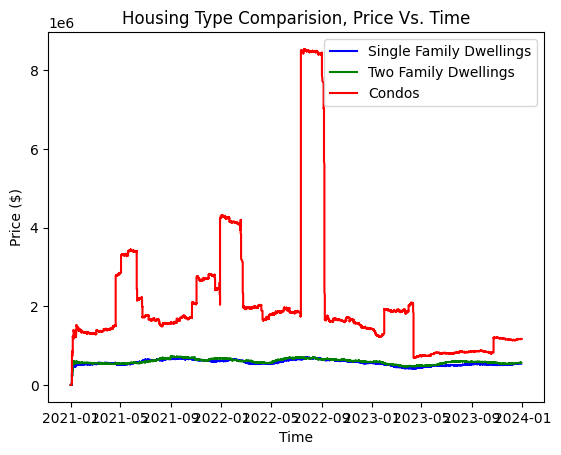

-----Each Housing Type Mean Sales Price By Year:-----
Single Family Dwellings:
	 2021:  599286.2
	 2021:  602992.09
	 2023:  495119.6
Two Family Dwellings:
	 2021:  620356.3
	 2021:  624436.63
	 2023:  544926.73
Condos:
	 2021:  2433942.15
	 2021:  2785137.2
	 2023:  1134780.91


In [ ]:
#Sales Prices vs Time
window_size = 2500
Onef_Price_Avg = Onef_Dwelling_Data['Sale Price'].rolling(window=window_size, min_periods=1).mean()
Twof_Price_Avg = Twof_Dwelling_Data['Sale Price'].rolling(window=window_size, min_periods=1).mean()
Condo_Price_Avg = Condo_Data['Sale Price'].rolling(window=window_size, min_periods=1).mean()


plt.plot(Onef_Dwelling_Data['Sale Date'], Onef_Price_Avg, label = 'Single Family Dwellings', color='blue')
plt.plot(Twof_Dwelling_Data['Sale Date'], Twof_Price_Avg, label = 'Two Family Dwellings', color='green')
plt.plot(Condo_Data['Sale Date'], Condo_Price_Avg, label = 'Condos', color='red')

plt.xlabel('Time')
plt.ylabel('Price ($)')
plt.title('Housing Type Comparision, Price Vs. Time')

plt.legend()

plt.show()

print("-----Each Housing Type Mean Sales Price By Year:-----")
print("Single Family Dwellings:")
print("\t 2021: " , Onef_Dwelling_Data['Sale Price'].loc[Onef_Dwelling_Data['Sale Date'] < '2022-01-01'].mean().round(2))
print("\t 2021: " , Onef_Dwelling_Data['Sale Price'].loc[(Onef_Dwelling_Data['Sale Date'] > '2021-12-31') & (Onef_Dwelling_Data['Sale Date'] < '2023-01-01')].mean().round(2))
print("\t 2023: " , Onef_Dwelling_Data['Sale Price'].loc[Onef_Dwelling_Data['Sale Date'] > '2022-12-31'].mean().round(2))
print("Two Family Dwellings:")
print("\t 2021: " , Twof_Dwelling_Data['Sale Price'].loc[Twof_Dwelling_Data['Sale Date'] < '2022-01-01'].mean().round(2))
print("\t 2021: " , Twof_Dwelling_Data['Sale Price'].loc[(Twof_Dwelling_Data['Sale Date'] > '2021-12-31') & (Twof_Dwelling_Data['Sale Date'] < '2023-01-01')].mean().round(2))
print("\t 2023: " , Twof_Dwelling_Data['Sale Price'].loc[Twof_Dwelling_Data['Sale Date'] > '2022-12-31'].mean().round(2))
print("Condos:")
print("\t 2021: " , Condo_Data['Sale Price'].loc[Condo_Data['Sale Date'] < '2022-01-01'].mean().round(2))
print("\t 2021: " , Condo_Data['Sale Price'].loc[(Condo_Data['Sale Date'] > '2021-12-31') & (Condo_Data['Sale Date'] < '2023-01-01')].mean().round(2))
print("\t 2023: " , Condo_Data['Sale Price'].loc[Condo_Data['Sale Date'] > '2022-12-31'].mean().round(2))

[20229, 19264, 15493] [15591, 16793, 13057] [16322, 15856, 11526]


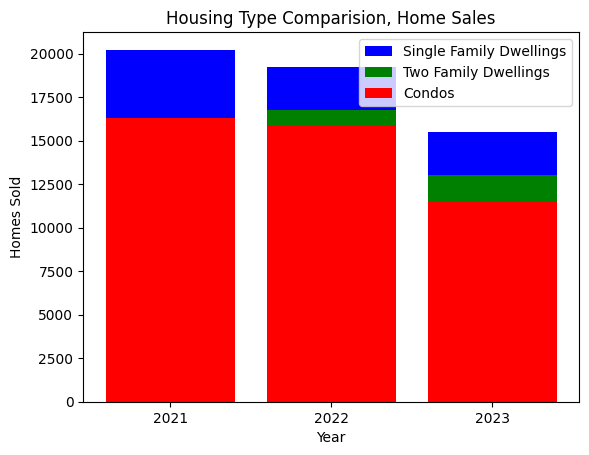

In [ ]:
#Sales vs Time
Years = ['2021', '2022', '2023']
Onef_Sales_Count = [Onef_Dwelling_Data.loc[Onef_Dwelling_Data['Sale Date'] < '2022-01-01'].shape[0],
                    Onef_Dwelling_Data.loc[(Onef_Dwelling_Data['Sale Date'] > '2021-12-31') & (Onef_Dwelling_Data['Sale Date'] < '2023-01-01')].shape[0],
                    Onef_Dwelling_Data.loc[Onef_Dwelling_Data['Sale Date'] > '2022-12-31'].shape[0]]
Twof_Sales_Count = [Twof_Dwelling_Data.loc[Twof_Dwelling_Data['Sale Date'] < '2022-01-01'].shape[0],
                    Twof_Dwelling_Data.loc[(Twof_Dwelling_Data['Sale Date'] > '2021-12-31') & (Twof_Dwelling_Data['Sale Date'] < '2023-01-01')].shape[0],
                    Twof_Dwelling_Data.loc[Twof_Dwelling_Data['Sale Date'] > '2022-12-31'].shape[0]]
Condo_Sales_Count = [Condo_Data.loc[Condo_Data['Sale Date'] < '2022-01-01'].shape[0],
                     Condo_Data.loc[(Condo_Data['Sale Date'] > '2021-12-31') & (Condo_Data['Sale Date'] < '2023-01-01')].shape[0],
                     Condo_Data.loc[Condo_Data['Sale Date'] > '2022-12-31'].shape[0]]
print(Onef_Sales_Count, Twof_Sales_Count, Condo_Sales_Count)

plt.bar(Years, Onef_Sales_Count, label = 'Single Family Dwellings', color='blue')
plt.bar(Years, Twof_Sales_Count, label = 'Two Family Dwellings', color='green')
plt.bar(Years, Condo_Sales_Count, label = 'Condos', color='red')

plt.xlabel('Year')
plt.ylabel('Homes Sold')
plt.title('Housing Type Comparision, Home Sales')

plt.legend()

plt.show()

From the visuals above you can see that a majority of house sales in NYC are condos and that condos are the most expensive housing type in New York City--with condos consistently being 2 to 4 times more expensive than the other options.

Additionally you can see that the mean sales price for all of the house types fell from 2022 to 2023. Indicating the NYC real estate market is stagnating.

# **Q4 Regression Modelling Task**

Predict house prices based off of the various attributes provided in the NYC Sales Data

I will be only be using the data from 2021-2022 as I know I am missing some data in my dataset for 2023 (I messed up during dataset creation and only have 14 of 15 excel sheets included).

I will also only be predicting prices for buildings of a Building Class Category with 5000 or more records between 2021-2023. This is becuase I feel there is too little data to predict the sale price of some of these less common building categories.




In [21]:
allowed_building_classes = ['01 ONE FAMILY DWELLINGS',
                            '02 TWO FAMILY DWELLINGS',
                            '13 CONDOS - ELEVATOR APARTMENTS',
                            '10 COOPS - ELEVATOR APARTMENTS',
                            '03 THREE FAMILY DWELLINGS',
                            '09 COOPS - WALKUP APARTMENTS',
                            '07 RENTALS - WALKUP APARTMENTS']

regression_data = all_data.loc[(all_data['Sale Date'] < '2023-01-01') & (all_data['Building Class Category'].isin(allowed_building_classes))]

# **Q5 Feature Selection and Analysis for Regression Task**

I chose to only use the attributes: Borough, Neighborhood, Building Class Category, Land Square Feet, Gross Square Feet, Year Built, and Sale Date. As I feel these categories have the greatest impact on how much one is willing to put on a home.

In [40]:
allowed_categories = ['Borough', 'Neighborhood', 'Building Class Category', 'Land Square Feet', 'Gross Square Feet', 'Year Built', 'Sale Date']
regression_data = regression_data[allowed_categories]

Now we'll need to check if multicollinearity exists between any of our selected variables.

In [50]:
#Multicollinearity Check
correlation_matrix = regression_data.corr()
print(correlation_matrix)

numerical_cols = list(regression_data.select_dtypes(exclude=['object']).columns)
numerical_cols = numerical_cols[:-2] #So we dont scale Sale Date and Sale Price
numerical_data = regression_data[numerical_cols] #All numerical data

vif = pd.DataFrame()
vif["features"] = numerical_data .columns
vif["VIF"] = [variance_inflation_factor(numerical_data .values, i) for i in range (numerical_data.values.shape[1])]
vif.sort_values('VIF', ascending=False)

                    Borough  Land Square Feet  Gross Square Feet  Year Built
Borough            1.000000          0.169868          -0.257033    0.026903
Land Square Feet   0.169868          1.000000           0.500602    0.076130
Gross Square Feet -0.257033          0.500602           1.000000   -0.059056
Year Built         0.026903          0.076130          -0.059056    1.000000


There is a mild degree of collinearity between Land Square Feet, and Gross Square Feet which is to be expected. Since it is not extreme and model is being used for prediction only nothing will be done.

# **Q6 Regression Model**

In [51]:
from sklearn.preprocessing import RobustScaler
from sklearn import linear_model
import sklearn.model_selection as ms
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge, Lasso

#for sale_price and sale_date, we do not want to scale them
scaler = RobustScaler()
numerical_data = scaler.fit_transform(numerical_data)

numerical_data = pd.get_dummies(numerical_data , drop_first=True)
print("final data shape", numerical_data.shape)

numerical_data.to_csv('regression_data.csv', index=False)

# split the data into train and test set
train, test = train_test_split(numerical_data, test_size=0.2, shuffle=True, random_state=123)

y_train = train['Sale_Price']
y_test = test['Sale_Price']
X_train = train.drop(['Sale_Price'], axis=1)
X_test  = test.drop(['Sale_Price'], axis=1)

def rmse(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))


def train_test(model):
    print(model)
    model.fit(X_train.values, y_train.values)
    print("RMSE train: {}".format(rmse(y_train.values, model.predict(X_train.values))))
    print("RMSE test : {}".format(rmse(y_test.values,  model.predict(X_test.values))))

    plt.scatter(y_test, model.predict(X_test.values), s=5 )
    plt.xlabel('Real Price')
    plt.ylabel('Predicted Price')
    plt.title( "Real vs Predicted Housing Prices")
    plt.show()

    plt.scatter( y_test,model.predict(X_test.values)-y_test, s=5)
    plt.xlabel('Real Price')
    plt.ylabel('Residual')
    plt.title( "Residuals vs Real")
    plt.show()

def residual_plots(X_train, X_test, Y_train, Y_test, Predicted_Y_train, Predicted_Y_test):
    interested_attribute_groups = ['']

# a multiple linear regression model
model_base = linear_model.LinearRegression()

# With Ridge and Lasso
lambda_list_ridge = list(np.linspace(20, 25, 101))
model_ridge = Ridge(alpha=lambda_list_ridge[0])

lambda_list_lasso = list(np.linspace(0.0006, 0.0007, 11))
model_lasso = Lasso(alpha=lambda_list_lasso[0], max_iter=500000)

for model in [model_base, model_ridge]:
    train_test(model)

ValueError: Data must be 1-dimensional